# **Bank Customer Churn Prediction Model using Machine Learning**

# **Objective of the Problem Statement**


 In this Real world Problem on Bank Customer Churn Model you will learn the Data Encoding, Feature Scaling, Handling Imbalanced Data, Support Vector Machine Classifier and Grid Search for Hyperparameter tuning from scratch with detailed explanation of the concept.

 Customer churn is the percentage of customers who stopped purchasing your business's products or services during a certain period of time.

 So we are going to classify customers based on their target attributes for the customer churn prediction.

*   **Data Encoding** - Data Encoding is an important pre-processing step in Machine Learning. It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process

*   **Feature Scaling** - Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

*   **Handling Imbalance Data** - Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. So we are using the below two techniques for handling imbalance data.
    * Random Under Sampling Techniques
    * Random Over Sampling Techniques
*   **Support Vector Classifier** - A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs.
*   **Hyperparameter Tuning using Grid Search Algorithm** - We will improve the hyperparameters of the best performing models so that it can be improved further more. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.





# Data Source - https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Describe Data

In [5]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
# Set CustomerId as index
df = df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
# Lets see the distribition of data after setting customerId as index
df.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Visualization



*   Seaborn Pairplot - To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function.

      The diagonal plots are the univariate plots, and this displays the relationship for the (n, 2) combination of variables in a DataFrame as a matrix of plots.
*   



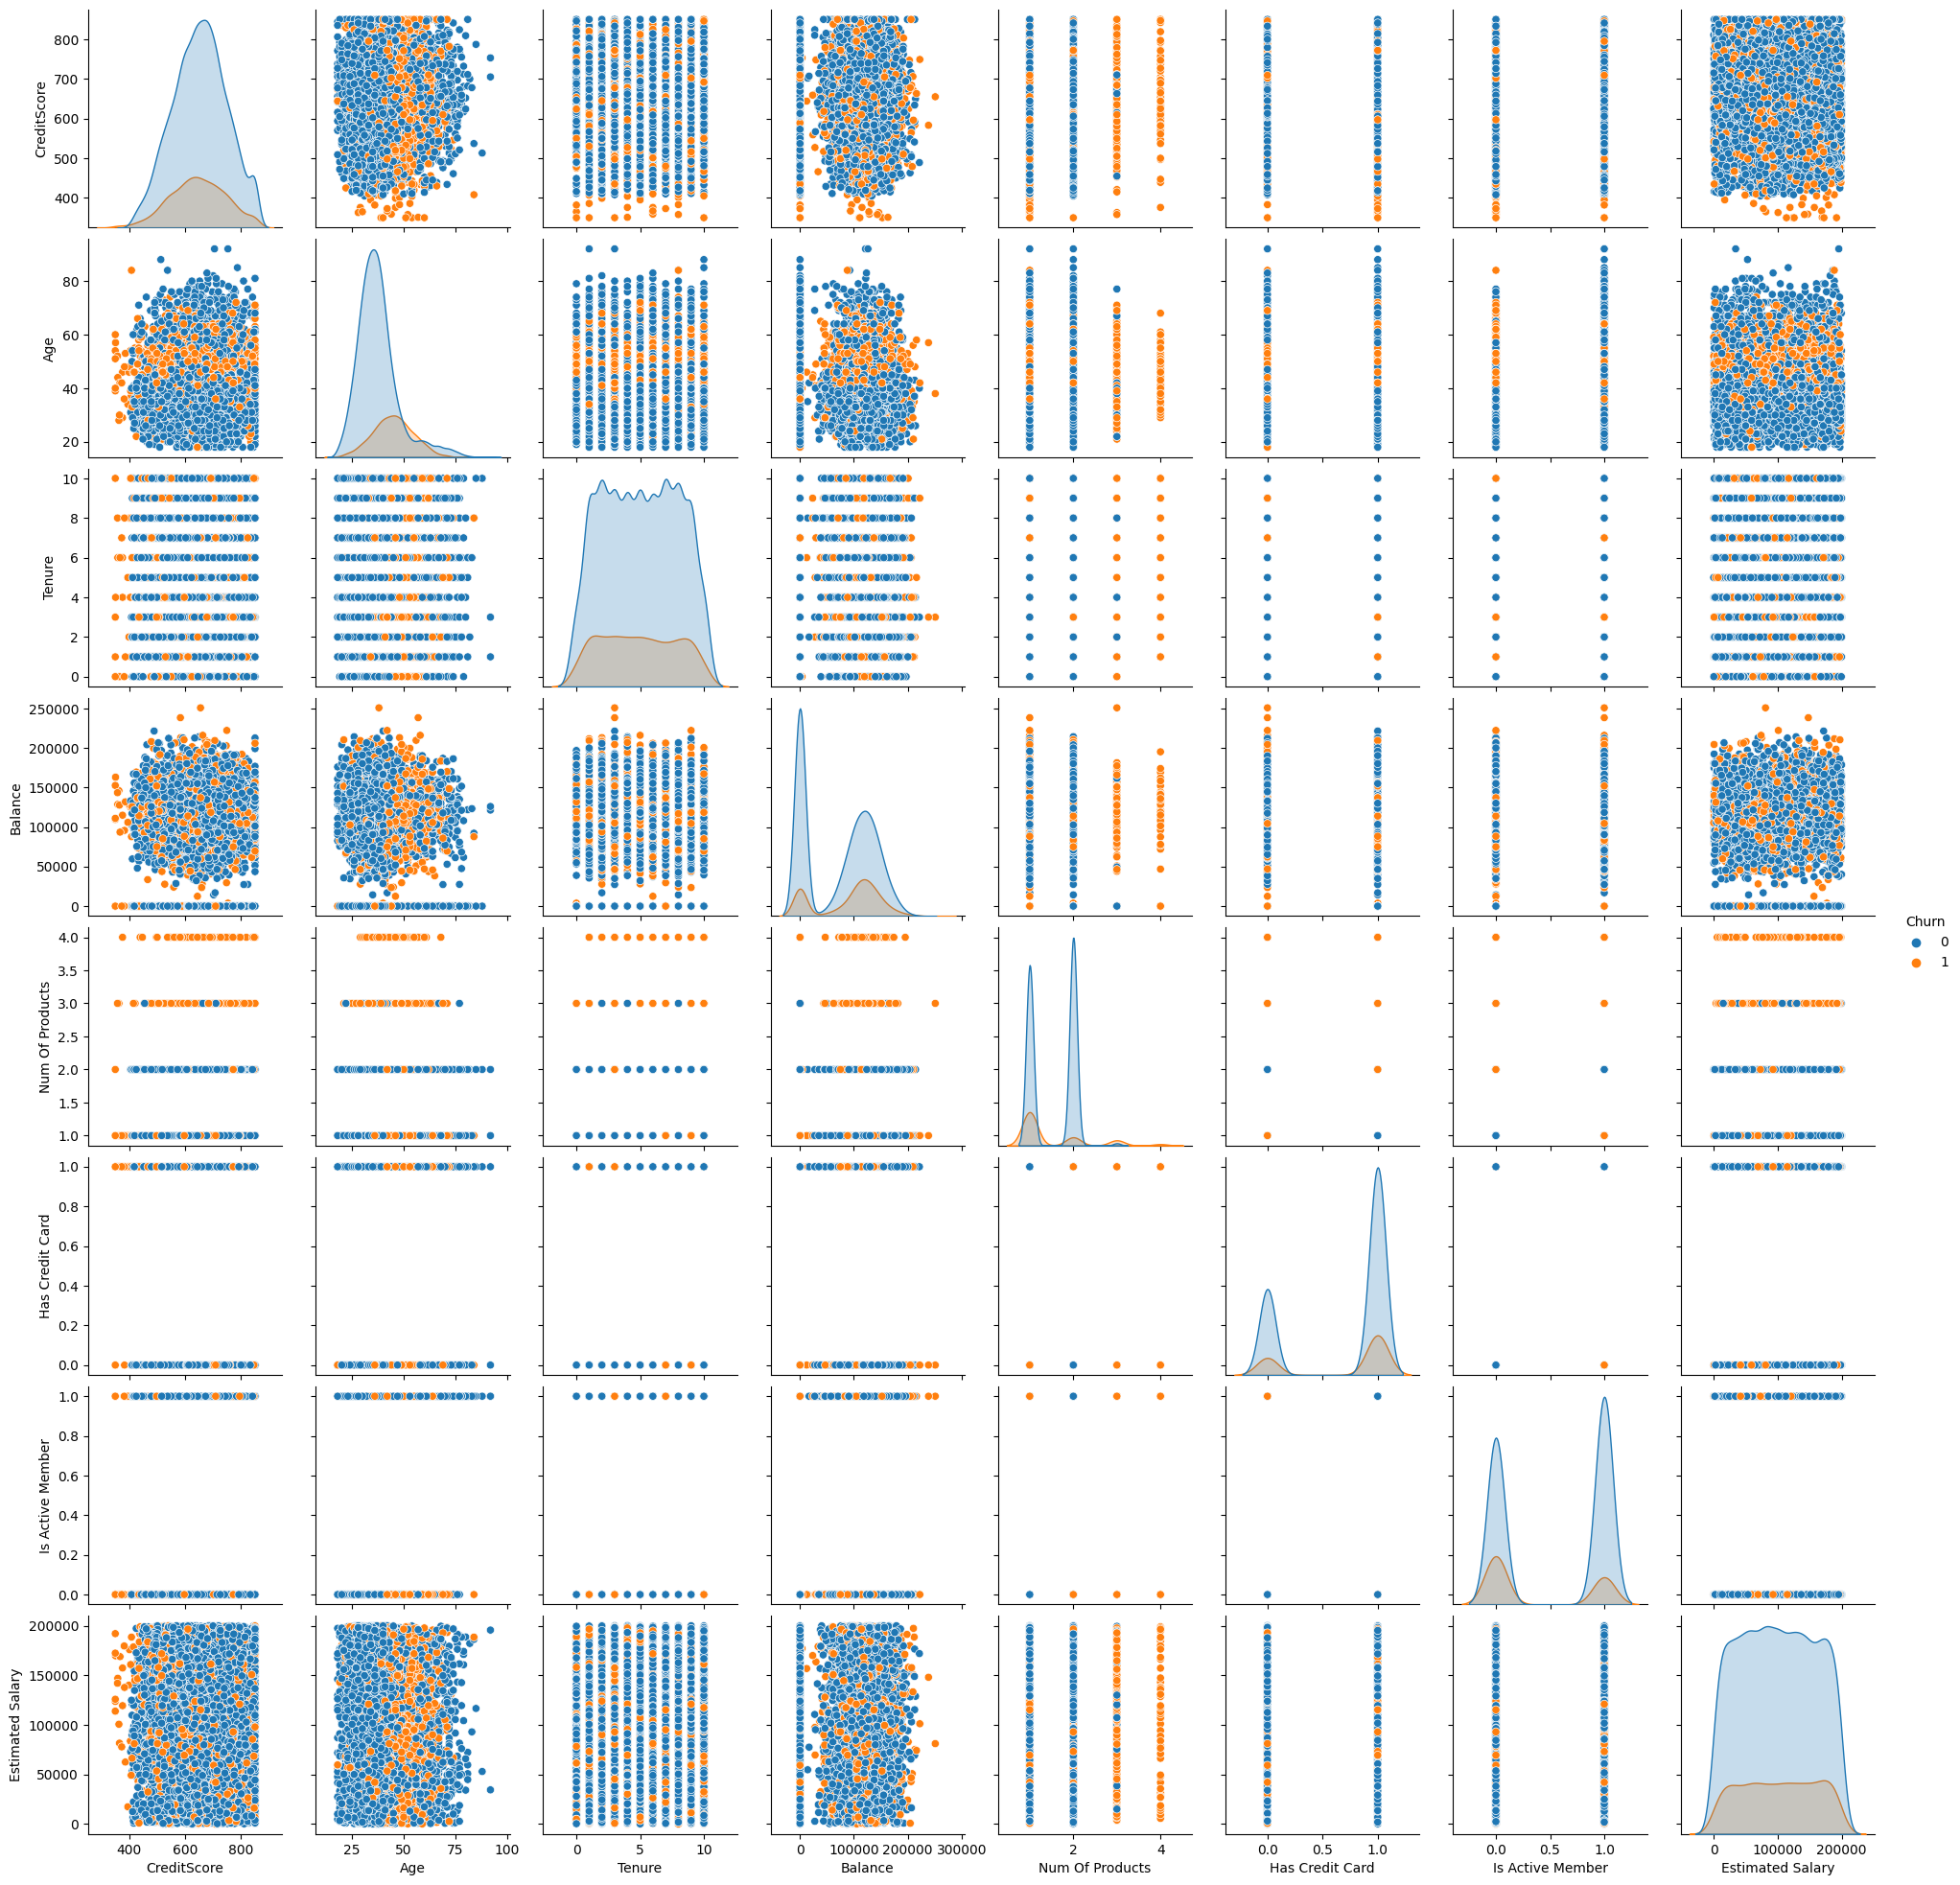

In [12]:
sns.pairplot(df,hue='Churn')
plt.show()

## As we can see the imbalance in the dataset

# Data Preprocessing

## Encoding

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.replace({'Geography' : {'France' : 2,'Germany' : 1, 'Spain' : 0}}, inplace=True)

In [15]:
df['Geography']

CustomerId
15634602    2
15647311    0
15619304    2
15701354    2
15737888    0
           ..
15606229    2
15569892    2
15584532    2
15682355    1
15628319    2
Name: Geography, Length: 10000, dtype: int64

In [16]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
df.replace({'Gender' : {'Male' : 0, 'Female' : 1}},inplace=True)

In [18]:
df['Gender']

CustomerId
15634602    1
15647311    1
15619304    1
15701354    1
15737888    1
           ..
15606229    0
15569892    0
15584532    1
15682355    0
15628319    1
Name: Gender, Length: 10000, dtype: int64

In [19]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [20]:
df.replace({'Num of Products' : {1:0,2:1,3:1,4:1}},inplace=True)

In [21]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [22]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [23]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [24]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [25]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

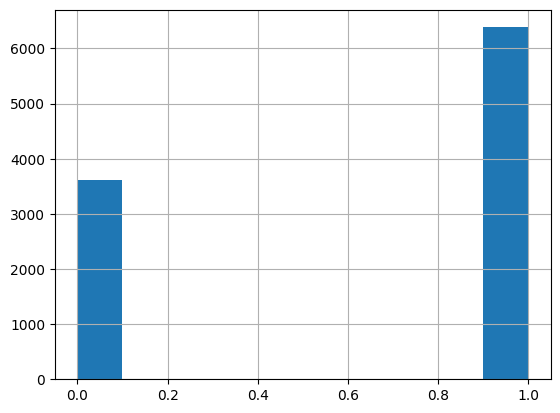

In [26]:
df['Zero Balance'].hist()

In [27]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [33]:
df.groupby(['Churn','Has Credit Card']).count()

Surname  CreditScore  Geography  Gender   Age  Tenure  \
Churn Has Credit Card                                                          
0     0                   2332         2332       2332    2332  2332    2332   
      1                   5631         5631       5631    5631  5631    5631   
1     0                    613          613        613     613   613     613   
      1                   1424         1424       1424    1424  1424    1424   

                       Balance  Num Of Products  Is Active Member  \
Churn Has Credit Card                                               
0     0                   2332             2332              2332   
      1                   5631             5631              5631   
1     0                    613              613               613   
      1                   1424             1424              1424   

                       Estimated Salary  Zero Balance  
Churn Has Credit Card                                  
0     0                            2332          2332  
      1                            5631          5631  
1     0                             613           613  
      1                            1424          1424

In [31]:
df.groupby(['Churn','Num Of Products']).count()

Surname  CreditScore  Geography  Gender   Age  Tenure  \
Churn Num Of Products                                                          
0     1                   3675         3675       3675    3675  3675    3675   
      2                   4242         4242       4242    4242  4242    4242   
      3                     46           46         46      46    46      46   
1     1                   1409         1409       1409    1409  1409    1409   
      2                    348          348        348     348   348     348   
      3                    220          220        220     220   220     220   
      4                     60           60         60      60    60      60   

                       Balance  Has Credit Card  Is Active Member  \
Churn Num Of Products                                               
0     1                   3675             3675              3675   
      2                   4242             4242              4242   
      3                     46               46                46   
1     1                   1409             1409              1409   
      2                    348              348               348   
      3                    220              220               220   
      4                     60               60                60   

                       Estimated Salary  Zero Balance  
Churn Num Of Products                                  
0     1                            3675          3675  
      2                            4242          4242  
      3                              46            46  
1     1                            1409          1409  
      2                             348           348  
      3                             220           220  
      4                              60            60

# Define Target Variable (y) and Feature Variables (X)

In [34]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [35]:
X = df.drop(['Surname','Churn'],axis = 1)

In [36]:
y = df["Churn"]

In [37]:
X.shape,y.shape

((10000, 11), (10000,))

# Handling Imbalance Data in the Dataset

* Oversampling
* Undersampling

In [38]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

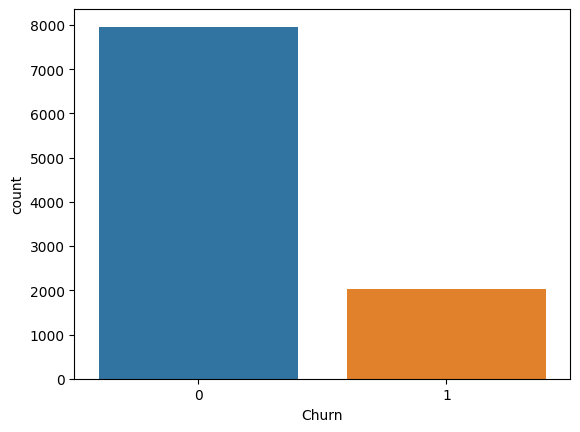

In [39]:
sns.countplot(x = 'Churn',data = df)

## Random Under Sampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(random_state=2537)

In [42]:
X_rus, y_rus = rus.fit_resample(X,y)

In [43]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [45]:
y.value_counts(), y_rus.value_counts()

(0    7963
 1    2037
 Name: Churn, dtype: int64,
 0    2037
 1    2037
 Name: Churn, dtype: int64)

<Axes: ylabel='Frequency'>

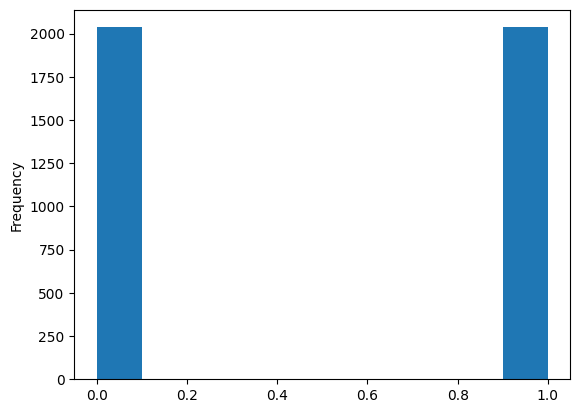

In [46]:
y_rus.plot(kind = 'hist')

## Random Over Sampling

In [47]:
from imblearn.over_sampling import RandomOverSampler


In [48]:
ros = RandomOverSampler(random_state=2537)

In [49]:
X_ros, y_ros = ros.fit_resample(X,y)

In [50]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [51]:
y.value_counts(), y_ros.value_counts()

(0    7963
 1    2037
 Name: Churn, dtype: int64,
 1    7963
 0    7963
 Name: Churn, dtype: int64)

<Axes: >

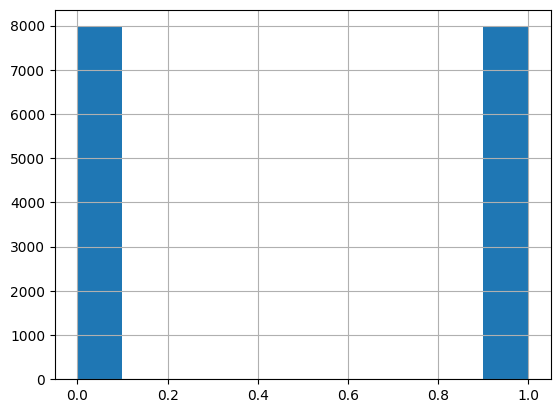

In [52]:
y_ros.hist()

# Train test split

In [53]:
from sklearn.model_selection import train_test_split

## spliting of original data with imbalance in the dataset

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=30)

## Spliting of Random Under Sampling data

In [55]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=30)

## Spliting of Random Over Sampling data

In [56]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=30)

# Standardize the Features

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()

## Standardize Orginal Data

In [59]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [60]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random Under Sample Data

In [61]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [62]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random Over Sample Data

In [63]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [64]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Modeling and Prediction

## Support Vector Machine trained with orginal data

In [66]:
from sklearn.svm import SVC

In [67]:
svc = SVC()

In [68]:
svc.fit(X_train,y_train)

SVC()

In [69]:
y_pred_og = svc.predict(X_test)

## Support Vector Machine trained with Random Under sampled Data

In [70]:
from sklearn.svm import SVC
svc_rus = SVC()
svc_rus.fit(X_train_rus,y_train_rus)
y_pred_rus =  svc_rus.predict(X_test_rus)

## Support Vector Machine trained with Random Over sampled Data

In [71]:
from sklearn.svm import SVC
svc_ros = SVC()
svc_ros.fit(X_train_ros,y_train_ros)
y_pred_ros =  svc_rus.predict(X_test_ros)

# Model Evaluation

## Model Accuracy for SVM trained with orginal data

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
confusion_matrix(y_test,y_pred_og)

array([[2327,   36],
       [ 411,  226]])

In [74]:
print(classification_report(y_test,y_pred_og))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2363
           1       0.86      0.35      0.50       637

    accuracy                           0.85      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.85      0.85      0.83      3000



## Model Accuracy for SVM trained with random under sampled data

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[477, 119],
       [155, 472]])

In [81]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       596
           1       0.80      0.75      0.78       627

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223



## Model Accuracy for SVM trained with random over sampled data

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1937,  447],
       [ 607, 1787]])

In [83]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      2384
           1       0.80      0.75      0.77      2394

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



# Hyperparameter Tuning

## Hyperparameter Tuning for model trained with orginal data

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1,1,10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}
grid_og = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_og.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [86]:
print(grid_og.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [93]:
grid_og_prediction = grid_og.predict(X_test)

In [94]:
confusion_matrix(y_test,grid_og_prediction)

array([[2175,  188],
       [ 414,  223]])

In [95]:
print(classification_report(y_test,grid_og_prediction))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2363
           1       0.54      0.35      0.43       637

    accuracy                           0.80      3000
   macro avg       0.69      0.64      0.65      3000
weighted avg       0.78      0.80      0.78      3000



## Hyperparameter Tuning for model trained with random under sampled data

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1,1,10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [91]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [96]:
grid_rus_prediction = grid_rus.predict(X_test_rus)

In [97]:
confusion_matrix(y_test_rus,grid_rus_prediction)

array([[475, 121],
       [155, 472]])

In [99]:
print(classification_report(y_test_rus,grid_rus_prediction))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       596
           1       0.80      0.75      0.77       627

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.78      0.77      0.77      1223



## Hyperparameter Tuning for model trained with random over sampled data

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1,1,10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [101]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [102]:
grid_ros_prediction = grid_ros.predict(X_test_ros)

In [103]:
confusion_matrix(y_test_ros,grid_ros_prediction)

array([[2094,  290],
       [ 109, 2285]])

In [104]:
print(classification_report(y_test_ros,grid_ros_prediction))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2384
           1       0.89      0.95      0.92      2394

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



## Explaination

In [105]:
# lets see the model accuracy of the tuned model with original dataset
print(classification_report(y_test,grid_og_prediction))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2363
           1       0.54      0.35      0.43       637

    accuracy                           0.80      3000
   macro avg       0.69      0.64      0.65      3000
weighted avg       0.78      0.80      0.78      3000



In [106]:
# lets see the model accuracy of the tuned model with random under sampled dataset
print(classification_report(y_test_rus,grid_rus_prediction))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       596
           1       0.80      0.75      0.77       627

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.78      0.77      0.77      1223



In [107]:
# lets see the model accuracy of the tuned model with random over sampled dataset
print(classification_report(y_test_ros,grid_ros_prediction))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2384
           1       0.89      0.95      0.92      2394

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



**By the above reports we can see the results of the tuned models using grid search cv algorithm. we can see the model trained with random over sampled data after hyperparameter tuning it has overall better accuracy, f1-score, recall, precision than other models. So we chose this model for solving the customer churn prediction problem. Hence we have solved customer churn prediction using machine learning techniques and algorithms**